# Effects of Water Stress on Crop Yield and Yield Estimation using Machine Learning

# Essential Libraries

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation

In [73]:
df=pd.read_csv(r"/home/rachit/Documents/Extra/yield_prediction/Yield_Prediction_Data - Sheet1.csv") 

In [74]:
df.head()

,Year,District,NDVI,T-min(Kelvin),T-max(Kelvin),Area (Hectare),Production (Tonnes),Soil_Moisture,Total_Precipitation(mm),Total_PET(mm),Total_ET(mm),Yield (Tonnes/Hectare)
0,2000-01,Amritsar,0.421800,291.962301,307.384153,361000,1690000,20.145042,608.380271,9095.585661,2683.837844,4.681440
1,2000-01,Bathinda,0.383781,292.597252,307.389505,243000,1014000,16.331429,493.209146,8710.903429,2821.642392,4.172840
2,2000-01,Faridkot,0.408001,292.511493,307.170434,111000,524000,15.700160,474.144844,8552.966567,2845.246162,4.720721
3,2000-01,Fatehgarh Sahib,0.447948,292.335116,306.663687,86000,434000,19.959668,602.781960,8849.301189,2801.849816,5.046512
4,2000-01,Firozpur,0.425524,292.287922,307.218812,378000,1705000,17.598275,531.467907,8638.043307,3122.386044,4.510582


In [75]:
df.columns

Index(['Year', 'District', 'NDVI', 'T-min(Kelvin)', 'T-max(Kelvin)',
       'Area (Hectare)', 'Production (Tonnes)', 'Soil_Moisture',
       'Total_Precipitation(mm)', 'Total_PET(mm)', 'Total_ET(mm)',
       'Yield (Tonnes/Hectare)'],
      dtype='object')

# Preprocessing

In [76]:
df['Year']=df['Year'].str.split('-',expand=True)[0]

In [77]:
df.head()

,Year,District,NDVI,T-min(Kelvin),T-max(Kelvin),Area (Hectare),Production (Tonnes),Soil_Moisture,Total_Precipitation(mm),Total_PET(mm),Total_ET(mm),Yield (Tonnes/Hectare)
0,2000,Amritsar,0.421800,291.962301,307.384153,361000,1690000,20.145042,608.380271,9095.585661,2683.837844,4.681440
1,2000,Bathinda,0.383781,292.597252,307.389505,243000,1014000,16.331429,493.209146,8710.903429,2821.642392,4.172840
2,2000,Faridkot,0.408001,292.511493,307.170434,111000,524000,15.700160,474.144844,8552.966567,2845.246162,4.720721
3,2000,Fatehgarh Sahib,0.447948,292.335116,306.663687,86000,434000,19.959668,602.781960,8849.301189,2801.849816,5.046512
4,2000,Firozpur,0.425524,292.287922,307.218812,378000,1705000,17.598275,531.467907,8638.043307,3122.386044,4.510582


In [78]:
df.columns

Index(['Year', 'District', 'NDVI', 'T-min(Kelvin)', 'T-max(Kelvin)',
       'Area (Hectare)', 'Production (Tonnes)', 'Soil_Moisture',
       'Total_Precipitation(mm)', 'Total_PET(mm)', 'Total_ET(mm)',
       'Yield (Tonnes/Hectare)'],
      dtype='object')

In [79]:
df["ET/PET"] = df['Total_ET(mm)'] / df['Total_PET(mm)']

# Visualization

# Total_ET (mm) vs. Yield (Tonnes/Hectare)

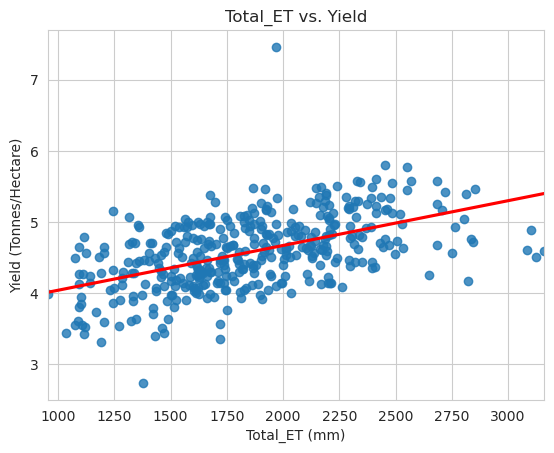

In [80]:
sns.set_style("whitegrid") 
sns.regplot(x='Total_ET(mm)', y='Yield (Tonnes/Hectare)', data=df, ci=None, line_kws={'color': 'red'})

# Set labels and title
plt.xlabel('Total_ET (mm)')
plt.ylabel('Yield (Tonnes/Hectare)')
plt.title('Total_ET vs. Yield')
plt.show()

# Ratio of ET/PET vs.Yield (Tonnes/Hectare)

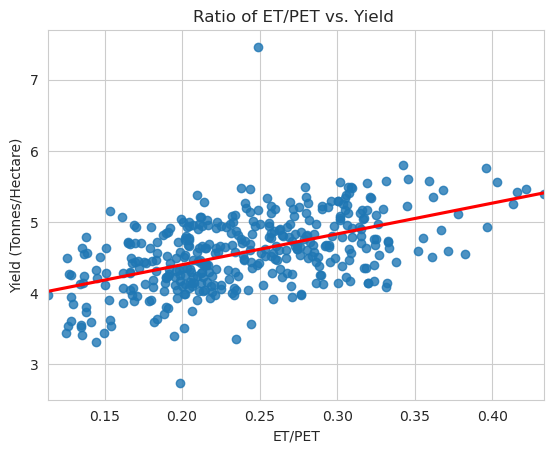

In [81]:
sns.set_style("whitegrid") 
sns.regplot(x='ET/PET', y='Yield (Tonnes/Hectare)', data=df, ci=None,line_kws={'color': 'red'})

plt.xlabel('ET/PET')
plt.ylabel('Yield (Tonnes/Hectare)')
plt.title('Ratio of ET/PET vs. Yield ')
plt.show()

# Total_Precipitation(mm) vs. Yield (Tonnes/Hectare)

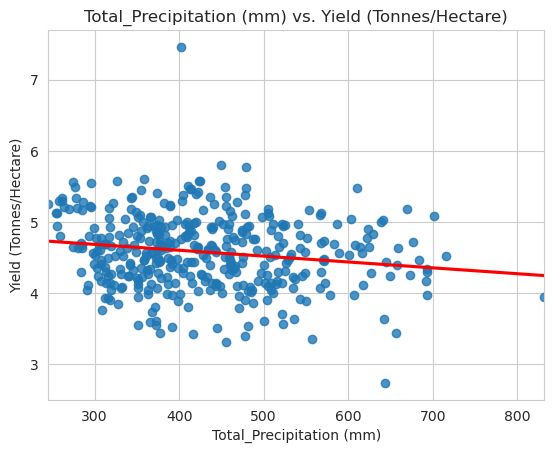

In [82]:
sns.set_style("whitegrid") 
sns.regplot(x='Total_Precipitation(mm)', y='Yield (Tonnes/Hectare)', data=df, ci=None,line_kws={'color': 'red'})

plt.xlabel('Total_Precipitation (mm)')
plt.ylabel('Yield (Tonnes/Hectare)')
plt.title('Total_Precipitation (mm) vs. Yield (Tonnes/Hectare)')
plt.show()

# Soil_Moisture (mm) vs. Total_Precipitation (mm)

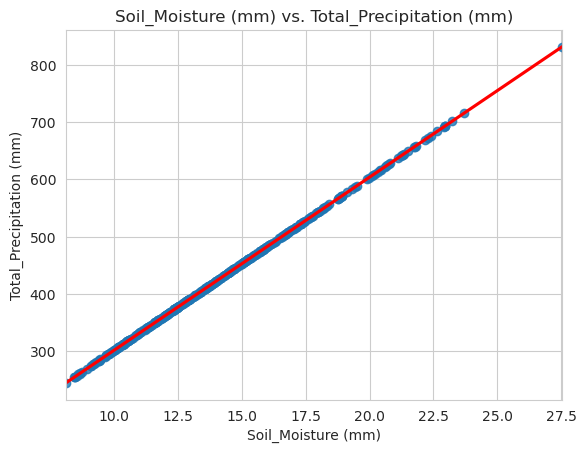

In [83]:
sns.set_style("whitegrid") 
sns.regplot(x='Soil_Moisture', y='Total_Precipitation(mm)', data=df, ci=None,line_kws={'color': 'red'})

plt.xlabel('Soil_Moisture (mm)')
plt.ylabel('Total_Precipitation (mm)')
plt.title('Soil_Moisture (mm) vs. Total_Precipitation (mm)')
plt.show()

# Soil_Moisture (mm) vs. Yield (Tonnes/Hectare)

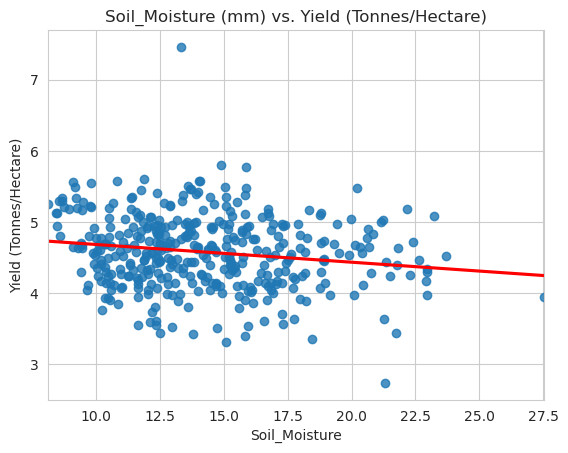

In [84]:
sns.set_style("whitegrid") 
sns.regplot(x='Soil_Moisture', y='Yield (Tonnes/Hectare)', data=df, ci=None,line_kws={'color': 'red'})

plt.xlabel('Soil_Moisture')
plt.ylabel('Yield (Tonnes/Hectare)')
plt.title('Soil_Moisture (mm) vs. Yield (Tonnes/Hectare)')
plt.show()

In [85]:
df.head()

,Year,District,NDVI,T-min(Kelvin),T-max(Kelvin),Area (Hectare),Production (Tonnes),Soil_Moisture,Total_Precipitation(mm),Total_PET(mm),Total_ET(mm),Yield (Tonnes/Hectare),ET/PET
0,2000,Amritsar,0.421800,291.962301,307.384153,361000,1690000,20.145042,608.380271,9095.585661,2683.837844,4.681440,0.295070
1,2000,Bathinda,0.383781,292.597252,307.389505,243000,1014000,16.331429,493.209146,8710.903429,2821.642392,4.172840,0.323921
2,2000,Faridkot,0.408001,292.511493,307.170434,111000,524000,15.700160,474.144844,8552.966567,2845.246162,4.720721,0.332662
3,2000,Fatehgarh Sahib,0.447948,292.335116,306.663687,86000,434000,19.959668,602.781960,8849.301189,2801.849816,5.046512,0.316618
4,2000,Firozpur,0.425524,292.287922,307.218812,378000,1705000,17.598275,531.467907,8638.043307,3122.386044,4.510582,0.361469


In [86]:
X=df.drop(columns=['Year', 'District','Yield (Tonnes/Hectare)'])
y=df.iloc[:,-2]

In [87]:
X

,NDVI,T-min(Kelvin),T-max(Kelvin),Area (Hectare),Production (Tonnes),Soil_Moisture,Total_Precipitation(mm),Total_PET(mm),Total_ET(mm),ET/PET
0,0.421800,291.962301,307.384153,361000,1690000,20.145042,608.380271,9095.585661,2683.837844,0.295070
1,0.383781,292.597252,307.389505,243000,1014000,16.331429,493.209146,8710.903429,2821.642392,0.323921
2,0.408001,292.511493,307.170434,111000,524000,15.700160,474.144844,8552.966567,2845.246162,0.332662
3,0.447948,292.335116,306.663687,86000,434000,19.959668,602.781960,8849.301189,2801.849816,0.316618
4,0.425524,292.287922,307.218812,378000,1705000,17.598275,531.467907,8638.043307,3122.386044,0.361469
...,...,...,...,...,...,...,...,...,...,...
392,0.351875,290.882356,302.321556,69000,299000,22.955326,693.250853,6625.723724,1743.166246,0.263091
393,0.378430,292.412082,304.569615,291000,1678000,15.860639,478.991295,6442.010918,2551.282730,0.396038
394,0.339649,291.676825,302.904983,50000,226000,23.700641,715.759345,6722.446515,1730.096388,0.257361
395,0.355314,291.823586,302.999301,77000,391000,23.236977,701.756700,6716.456390,1826.827522,0.271993


In [88]:
y

0      4.681440
1      4.172840
2      4.720721
3      5.046512
4      4.510582
         ...   
392    4.333333
393    5.766323
394    4.520000
395    5.077922
396    4.547872
Name: Yield (Tonnes/Hectare), Length: 397, dtype: float64

# Standard Scale

In [169]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

# Train Test Split

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [171]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [172]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)*100
rmse= np.sqrt(mse)
r2 = r2_score(y_test, y_pred)*100

print(f"Mean Absolute Error (MAE):{np.round(mae,2)} Tonnes/Hectare ")
print(f"Mean Squared Error (MSE): {np.round(mse,2)}")
print(f"Root Mean Squared Error: {np.round(rmse)} Tonnes/Hectare")
print(f"R-squared (R2): {np.round(r2,2)} %")

Mean Absolute Error (MAE):0.15 Tonnes/Hectare 
Mean Squared Error (MSE): 5.73
Root Mean Squared Error: 2.0 Tonnes/Hectare
R-squared (R2): 84.66 %


# RandomForestRegressor

In [173]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [174]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)*100
rmse= np.sqrt(mse)
r2 = r2_score(y_test, y_pred)*100

print(f"Mean Absolute Error (MAE):{np.round(mae,2)} Tonnes/Hectare ")
print(f"Mean Squared Error (MSE): {np.round(mse,2)}")
print(f"Root Mean Squared Error: {np.round(rmse)} Tonnes/Hectare")
print(f"R-squared (R2): {np.round(r2,2)} %")

Mean Absolute Error (MAE):0.29 Tonnes/Hectare 
Mean Squared Error (MSE): 17.46
Root Mean Squared Error: 4.0 Tonnes/Hectare
R-squared (R2): 53.3 %


# Polynomial Linear Regression

In [175]:
degree = 2
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

In [176]:
poly_model = LinearRegression()

poly_model.fit(X_poly_train, y_train)

y_pred_poly = poly_model.predict(X_poly_test)

In [177]:
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly= np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)*100

print(f"Polynomial Regression - Degree: {degree}")
print(f"Mean Absolute Error (MAE):{np.round(mae_poly,2)} Tonnes/Hectare ")
print(f"Mean Squared Error (MSE): {np.round(mse_poly,2)}")
print(f"Root Mean Squared Error: {np.round(rmse_poly,2)} Tonnes/Hectare")
print(f"R-squared (R2): {np.round(r2_poly,2)} %")

Polynomial Regression - Degree: 2
Mean Absolute Error (MAE):0.09 Tonnes/Hectare 
Mean Squared Error (MSE): 0.02
Root Mean Squared Error: 0.13 Tonnes/Hectare
R-squared (R2): 95.23 %
